**Saranpat Prasertthum (655667271)**

IE517 ML in Fin Lab

Module 7 Homework (Random Forest)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_validate,GridSearchCV

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree

**Load Data**

In [3]:
df = pd.read_csv("../IE517_S23_HW6/ccdefault.csv",index_col="ID")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
X, y = df.drop(["DEFAULT"],axis=1) ,df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

**Part 1: Random forest estimators**


In [5]:
hyperparameters = {
    'n_estimators': [10, 50, 100]
    # we can add more hyperparameter here
}

model = RandomForestClassifier()
# Using grid search to find best estimators
grid_search = GridSearchCV(model, hyperparameters, cv=10, scoring='accuracy',return_train_score = True) # not using cv
grid_search.fit(X, y)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [6]:
result = grid_search.cv_results_
rf_result_score = pd.DataFrame({'Params':result['params'] ,
                                'Train Score' : result['mean_train_score'],
                                'Test Score': result['mean_test_score'],
                                'Time': result['mean_score_time']
                                })
rf_result_score

,Params,Train Score,Test Score,Time
0,{'n_estimators': 10},0.979767,0.8060,0.022621
1,{'n_estimators': 50},0.998778,0.8141,0.070777
2,{'n_estimators': 100},0.999330,0.8160,0.118510


**Part 2: Random forest feature importance**

In [7]:
# geting feature from the best model
best_model = grid_search.best_estimator_
feature_importance = best_model.feature_importances_

In [8]:
indx = np.argsort(feature_importance)[::-1]
for i in range(X.shape[1]):
    print("{}) {} \t {}".format(i+1,X.columns[indx[i]],feature_importance[indx[i]]))

1) PAY_0 	 0.10298754113216403
2) AGE 	 0.06676504517298561
3) BILL_AMT1 	 0.060966557889269794
4) LIMIT_BAL 	 0.0590687078669226
5) BILL_AMT2 	 0.05463708901824798
6) BILL_AMT3 	 0.05200113130510807
7) PAY_AMT1 	 0.050455345882679324
8) BILL_AMT6 	 0.05028331685783399
9) BILL_AMT4 	 0.05019105627631013
10) BILL_AMT5 	 0.0497047628910534
11) PAY_AMT2 	 0.04794934753607938
12) PAY_AMT6 	 0.046166152415586414
13) PAY_AMT3 	 0.0457754258096817
14) PAY_AMT5 	 0.04382221292452148
15) PAY_AMT4 	 0.04351191047741708
16) PAY_2 	 0.03685150053097018
17) PAY_3 	 0.029151769200415286
18) PAY_4 	 0.024689189048072994
19) EDUCATION 	 0.020634061282455422
20) PAY_5 	 0.020123797754814834
21) PAY_6 	 0.018477919338017974
22) MARRIAGE 	 0.013829802618330791
23) SEX 	 0.01195635677106167


**Part 3: Conclusions**

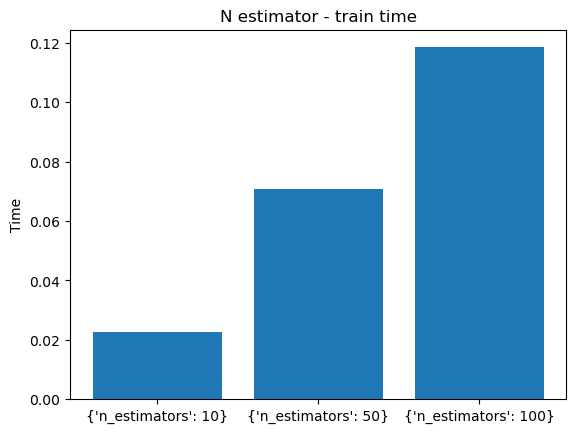

In [9]:
params = [ str(v) for v in rf_result_score['Params']]
plt.bar(params,rf_result_score['Time'])
plt.title('N estimator - train time')
plt.ylabel("Time")
plt.show()


**a) What is the relationship between n_estimators, in-sample CV accuracy and computation time?**

**ANS** If N estimator increase it will also increase computational time. 

In [10]:
grid_search.best_params_

{'n_estimators': 100}

**b) What is the optimal number of estimators for your forest?**

**ANS** The best estimators is 100 

(-1.0, 23.0)

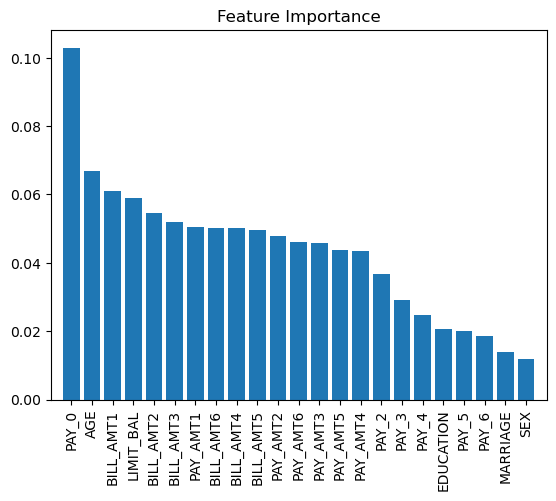

In [11]:
plt.title("Feature Importance")
plt.bar(X.columns[indx],feature_importance[indx],align='center')
plt.xticks(rotation = 90)
plt.xlim([-1,X.shape[1]])

**c) Which features contribute the most importance in your model according to scikit-learn 
function?**

**ANS** The most importance feature in my model is "PAY_0"  

**d) What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-
Learn.org documentation.)** 

**ANS** Feature importance in scikit-learn Random Forest models is calculated based on the decrease in node impurity caused by a feature, and the probability of reaching the node that uses the feature. This probability is determined by dividing the number of samples that reach the node by the total number of samples. The resulting values are then weighted and used to rank the importance of the features. Essentially, the higher the feature importance value, the more significant the feature is in predicting the target variable. 

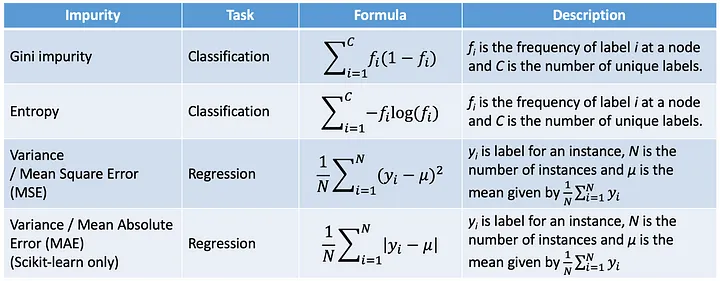 

Credit: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20importance%20is%20calculated%20as,the%20more%20important%20the%20feature.

**Part 4: Appendix**

In [12]:
print("My name is Saranpat Prasertthum")
print("My NetID is: 655667271")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Saranpat Prasertthum
My NetID is: 655667271
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
